# EDSA Unsupervised Learning Sprint
## Movie Recommender Systems

<div align="center" style="width: 900px; font-size: 80%; text-align: center; margin: 0 auto">
<img src="recommender_images.png"
     alt="Barnicles on your ship :( "
     style="float: center; padding-bottom=0.5em"
     width=900px/>
</div>

### The team:
- Thapelo Makhalanyane
- Kabelo Mbewe
- Reitumetse Nchoe
- Mpho Nonyane
- Hercules Smith

### The Goal:
- To build a model than can produce an estimated rating for given user and movie combination (that doesn't yet exist) quickly and accurately. This part of the project focuses on the best possible model performance, within reason (we cannot train until the heat-death of the universe, for example)

## Steps:
1. Bring in our data and Explore it a bit, gathering some insights about our data.
2. Format our data in a way that allows us to perform unsupervised learning tasks.
3. Build and evaluate some models
4. Refine our favourite model
5. Produce a submission
6. Conclusion

## Data Overview
This dataset consists of several million 5-star ratings obtained from users of the online MovieLens movie recommendation service. The MovieLens dataset has long been used by industry and academic researchers to improve the performance of explicitly-based recommender systems, and now you get to as well!

For this Predict, we'll be using a special version of the MovieLens dataset which has enriched with additional data, and resampled for fair evaluation purposes.

## Source
The data for the MovieLens dataset is maintained by the GroupLens research group in the Department of Computer Science and Engineering at the University of Minnesota. Additional movie content data was legally scraped from IMDB

## Supplied Files
- `genome_scores.csv` - a score mapping the strength between movies and tag-related properties.
- `genome_tags.csv` - user assigned tags for genome-related scores
- `imdb_data.csv` - Additional movie metadata scraped from IMDB using the `links.csv` file.
- `links.csv` - File providing a mapping between a MovieLens ID and associated IMDB and TMDB IDs.
- `tags.csv` - User assigned for the movies within the dataset.
- `test.csv` - The test split of the dataset. Contains user and movie IDs with no rating data.
- `train.csv` - The training split of the dataset. Contains user and movie IDs with associated rating data.

<br/>

---

<br/>

# Additional Information
The below information is provided directly from the MovieLens dataset description files:

### Ratings Data File Structure (`train.csv`)
All ratings are contained in the file train.csv. Each line of this file after the header row represents one rating of one movie by one user, and has the following format:

```
userId,movieId,rating,timestamp
```

The lines within this file are ordered first by userId, then, within user, by movieId.

Ratings are made on a 5-star scale, with half-star increments (0.5 stars - 5.0 stars).

Timestamps represent seconds since midnight Coordinated Universal Time (UTC) of January 1, 1970.

### Tags Data File Structure (`tags.csv`)
All tags are contained in the file tags.csv. Each line of this file after the header row represents one tag applied to one movie by one user, and has the following format:

```
userId,movieId,tag,timestamp
```

The lines within this file are ordered first by userId, then, within user, by movieId.

Tags are user-generated metadata about movies. Each tag is typically a single word or short phrase. The meaning, value, and purpose of a particular tag is determined by each user.

Timestamps represent seconds since midnight Coordinated Universal Time (UTC) of January 1, 1970

### Movies Data File Structure (`movies.csv`)
Movie information is contained in the file movies.csv. Each line of this file after the header row represents one movie, and has the following format:

```
movieId,title,genres
```

Movie titles are entered manually or imported from https://www.themoviedb.org/, and include the year of release in parentheses. Errors and inconsistencies may exist in these titles.

Genres are a pipe-separated list, and are selected from the following:

- Action
- Adventure
- Animation
- Children's
- Comedy
- Crime
- Documentary
- Drama
- Fantasy
- Film-Noir
- Horror
- Musical
- Mystery
- Romance
- Sci-Fi
- Thriller
- War
- Western
- (no genres listed)

### Links Data File Structure (`links.csv`)
Identifiers that can be used to link to other sources of movie data are contained in the file links.csv. Each line of this file after the header row represents one movie, and has the following format:

```
movieId,imdbId,tmdbId
```

movieId is an identifier for movies used by https://movielens.org. E.g., the movie Toy Story has the link https://movielens.org/movies/1.

imdbId is an identifier for movies used by http://www.imdb.com. E.g., the movie Toy Story has the link http://www.imdb.com/title/tt0114709/.

tmdbId is an identifier for movies used by https://www.themoviedb.org. E.g., the movie Toy Story has the link https://www.themoviedb.org/movie/862.

Use of the resources listed above is subject to the terms of each provider.

### Tag Genome (genome-scores.csv and `genome_tags.csv`)
As described in this article, the tag genome encodes how strongly movies exhibit particular properties represented by tags (atmospheric, thought-provoking, realistic, etc.). The tag genome was computed using a machine learning algorithm on user-contributed content including tags, ratings, and textual reviews.

The genome is split into two files. The file `genome_scores.csv` contains movie-tag relevance data in the following format:

```
movieId,tagId,relevance
```
The second file, `genome_tags.csv`, provides the tag descriptions for the tag IDs in the genome file, in the following format:

```
tagId,tag
```

# Step 1: Show me the data

(we start with imports)

In [1]:
import pandas as pd

from plotly import express as px

## helper functions

In [2]:
def demo_frame(df: pd.DataFrame):
    print(df.info())
    return df.head()

In [3]:
base_path = "./data"
genome_scores = pd.read_csv(f'{base_path}/genome_scores.csv')
genome_tags = pd.read_csv(f'{base_path}/genome_tags.csv')
imdb_data = pd.read_csv(f'{base_path}/imdb_data.csv')
# links = pd.read_csv(f'{base_path}/links.csv')  # we won't be using links at all
movies = pd.read_csv(f'{base_path}/movies.csv')
tags = pd.read_csv(f'{base_path}/tags.csv')
test = pd.read_csv(f'{base_path}/test.csv')
train = pd.read_csv(f'{base_path}/train.csv')

We'll start our journey by exploring the `genome` data, since that sounds the most interesting!

In [4]:
demo_frame(genome_scores)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15584448 entries, 0 to 15584447
Data columns (total 3 columns):
 #   Column     Dtype  
---  ------     -----  
 0   movieId    int64  
 1   tagId      int64  
 2   relevance  float64
dtypes: float64(1), int64(2)
memory usage: 356.7 MB
None


movieId  tagId  relevance
0        1      1    0.02875
1        1      2    0.02375
2        1      3    0.06250
3        1      4    0.07575
4        1      5    0.14075

In [5]:
demo_frame(genome_tags)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1128 entries, 0 to 1127
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tagId   1128 non-null   int64 
 1   tag     1128 non-null   object
dtypes: int64(1), object(1)
memory usage: 17.8+ KB
None


tagId           tag
0      1           007
1      2  007 (series)
2      3  18th century
3      4         1920s
4      5         1930s

Every movie is tagged with one of 1'128 tags, each movie-tag pair has a `relevance` score which seems to indicate how *strongly* the `movie` is associated with the `tag`.

To use this data we may have to perform a `merge` and a `pivot`.
All code tha combines / cleans data in any way is in the `scripts` folder under `data_cleaning.py`. The functions here generates new csv files and places them in a folder called `cleaned` so we don't have to waste processor cycles recleaning the same data over-and-over.


In [6]:
genome_tag_vec = pd.read_csv('cleaned/genome_tag_vec.csv')

demo_frame(genome_tag_vec)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13816 entries, 0 to 13815
Columns: 1129 entries, movieId to zombies
dtypes: float64(1128), int64(1)
memory usage: 119.0 MB
None


movieId      007  007 (series)  18th century    1920s    1930s    1950s  \
0        1  0.02875       0.02375       0.06250  0.07575  0.14075  0.14675   
1        2  0.04125       0.04050       0.06275  0.08275  0.09100  0.06125   
2        3  0.04675       0.05550       0.02925  0.08700  0.04750  0.04775   
3        4  0.03425       0.03800       0.04050  0.03100  0.06500  0.03575   
4        5  0.04300       0.05325       0.03800  0.04100  0.05400  0.06725   

     1960s    1970s   1980s  ...  world politics  world war i  world war ii  \
0  0.06350  0.20375  0.2020  ...         0.04050      0.01425       0.03050   
1  0.06925  0.09600  0.0765  ...         0.05250      0.01575       0.01250   
2  0.04600  0.14275  0.0285  ...         0.06275      0.01950       0.02225   
3  0.02900  0.08650  0.0320  ...         0.05325      0.02800       0.01675   
4  0.02775  0.07650  0.0215  ...         0.05350      0.02050       0.01425   

   writer's life  writers  writing    wuxia     wwii   zombie  zombies  
0        0.03500  0.14125  0.05775  0.03900  0.02975  0.08475  0.02200  
1        0.02000  0.12225  0.03275  0.02100  0.01100  0.10525  0.01975  
2        0.02300  0.12200  0.03475  0.01700  0.01800  0.09100  0.01775  
3        0.03875  0.18200  0.07050  0.01625  0.01425  0.08850  0.01500  
4        0.02550  0.19225  0.02675  0.01625  0.01300  0.08700  0.01600  

[5 rows x 1129 columns]

We know `Toy Story (1995)` has `movieId == 1`, so let's see what top 10 tags are most relevant to it:

In [7]:
sorted_tags = genome_tag_vec[genome_tag_vec.movieId == 1].T.sort_values(0, ascending=False)
sorted_tags.iloc[1:11]

0
toys                0.99925
computer animation  0.99875
pixar animation     0.99575
kids and family     0.98575
animation           0.98425
kids                0.98000
pixar               0.96450
children            0.95975
cartoon             0.95475
animated            0.94725

All of these are very agreeable tags! We might end up using this data to improve model performance later. For now, let's keep Exploring! We'll look at the IMDB data next:

In [8]:
demo_frame(imdb_data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27278 entries, 0 to 27277
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movieId        27278 non-null  int64  
 1   title_cast     17210 non-null  object 
 2   director       17404 non-null  object 
 3   runtime        15189 non-null  float64
 4   budget         7906 non-null   object 
 5   plot_keywords  16200 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 1.2+ MB
None


movieId                                         title_cast  \
0        1  Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...   
1        2  Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...   
2        3  Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...   
3        4  Whitney Houston|Angela Bassett|Loretta Devine|...   
4        5  Steve Martin|Diane Keaton|Martin Short|Kimberl...   

              director  runtime       budget  \
0        John Lasseter     81.0  $30,000,000   
1   Jonathan Hensleigh    104.0  $65,000,000   
2  Mark Steven Johnson    101.0  $25,000,000   
3       Terry McMillan    124.0  $16,000,000   
4       Albert Hackett    106.0  $30,000,000   

                                       plot_keywords  
0                   toy|rivalry|cowboy|cgi animation  
1                   board game|adventurer|fight|game  
2                         boat|lake|neighbor|rivalry  
3  black american|husband wife relationship|betra...  
4                    fatherhood|doberman|dog|mansion

Pretty self-explanatory; there is a need to clean the dataframe a bit - splitting on the pipe (|) and transforming `budget` to be numeric. Let's see what that looks like:

In [9]:
imdb_data = pd.read_csv('cleaned/imdb_data.csv')

demo_frame(imdb_data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27278 entries, 0 to 27277
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movieId        27278 non-null  int64  
 1   title_cast     17210 non-null  object 
 2   director       17404 non-null  object 
 3   runtime        27278 non-null  float64
 4   budget         27278 non-null  float64
 5   plot_keywords  16200 non-null  object 
dtypes: float64(2), int64(1), object(3)
memory usage: 1.2+ MB
None


movieId                                         title_cast  \
0        1  Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...   
1        2  Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...   
2        3  Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...   
3        4  Whitney Houston|Angela Bassett|Loretta Devine|...   
4        5  Steve Martin|Diane Keaton|Martin Short|Kimberl...   

              director  runtime      budget  \
0        John Lasseter     81.0  30000000.0   
1   Jonathan Hensleigh    104.0  65000000.0   
2  Mark Steven Johnson    101.0  25000000.0   
3       Terry McMillan    124.0  16000000.0   
4       Albert Hackett    106.0  30000000.0   

                                       plot_keywords  
0                   toy|rivalry|cowboy|cgi animation  
1                   board game|adventurer|fight|game  
2                         boat|lake|neighbor|rivalry  
3  black american|husband wife relationship|betra...  
4                    fatherhood|doberman|dog|mansion

Now we can mine some data about our movies!

In [10]:
from collections import Counter
from scripts.helpers import flatten_list

unique_actors_per_movie = imdb_data.title_cast.str.split('|').fillna("").apply(set)
print("Median # of actors per movie:", unique_actors_per_movie.apply(len).median().round().astype(int))
print("Total # of actors (in dataset):", len(set.union(*unique_actors_per_movie)))

actor_by_movies = pd.Series(Counter(flatten_list(unique_actors_per_movie))).sort_values(ascending=True)

fig = px.bar(
    data_frame=actor_by_movies.iloc[-20:], 
    x=0, 
    height=640,
    labels={"0": "# of Movies"}, 
    orientation='h', 
    title='Number of movies per actor'
)
fig.show()

Median # of actors per movie: 15
Total # of actors (in dataset): 121035


In [11]:
director_by_movies = pd.Series(Counter(imdb_data.director)).sort_values(ascending=True)

fig = px.bar(
    data_frame=director_by_movies.iloc[-20:-2], 
    x=0, 
    height=640,
    labels={"0": "# of Movies"}, 
    orientation='h', 
    title='Number of movies per director'
)
fig.show()

In [12]:
movie_keywords = imdb_data.plot_keywords.str.split('|').fillna("").apply(set)
keyword_by_movies = pd.Series(Counter(flatten_list(movie_keywords))).sort_values(ascending=True)

fig = px.bar(
    data_frame=keyword_by_movies.iloc[-20:], 
    x=0, 
    height=640,
    labels={"0": "# of Movies"}, 
    orientation='h', 
    title='Top Keywords'
)
fig.show()

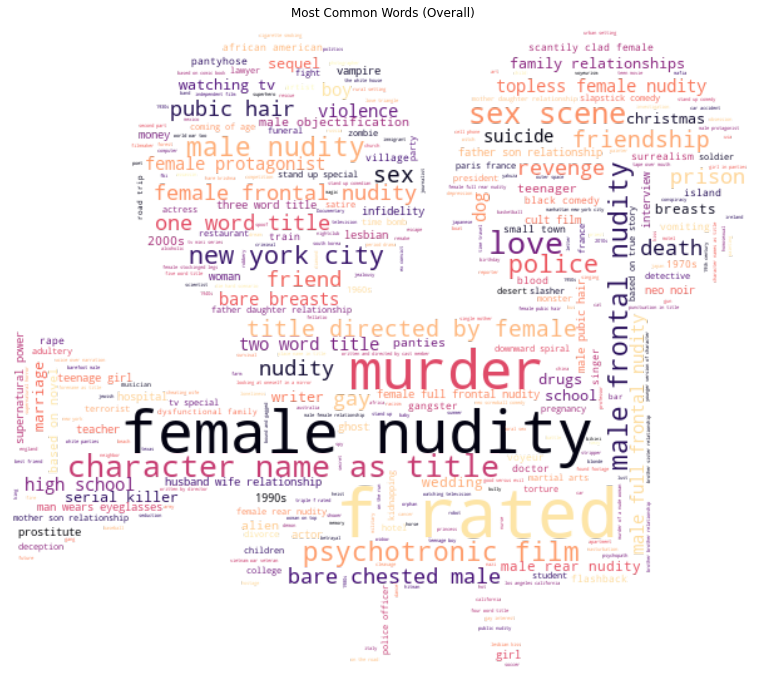

In [13]:
from wordcloud import WordCloud, STOPWORDS
import codecs
import imageio
import base64
import numpy as np

from matplotlib import pyplot as plt

mask = imageio.imread('assets/wc_mask.jpg')

def gen_wordcloud(word_freq, title, savefig=False):
    plt.figure(figsize=(16, 12))
    wc = WordCloud(colormap='magma', mask=mask, background_color=None, max_words=1_000, mode="RGBA")
    wc.generate_from_frequencies(word_freq)
    plt.title(title, fontsize=12)
    plt.axis("off")
    plt.margins(tight=True)
    plt.imshow(wc, interpolation="bilinear")
    if savefig:
        plt.savefig(f'{title}.png', transparent=True, bbox_inches='tight', dpi=200)
    plt.show()
    
gen_wordcloud(keyword_by_movies, "Most Common Words (Overall)", savefig=False)

## Most Common Genres

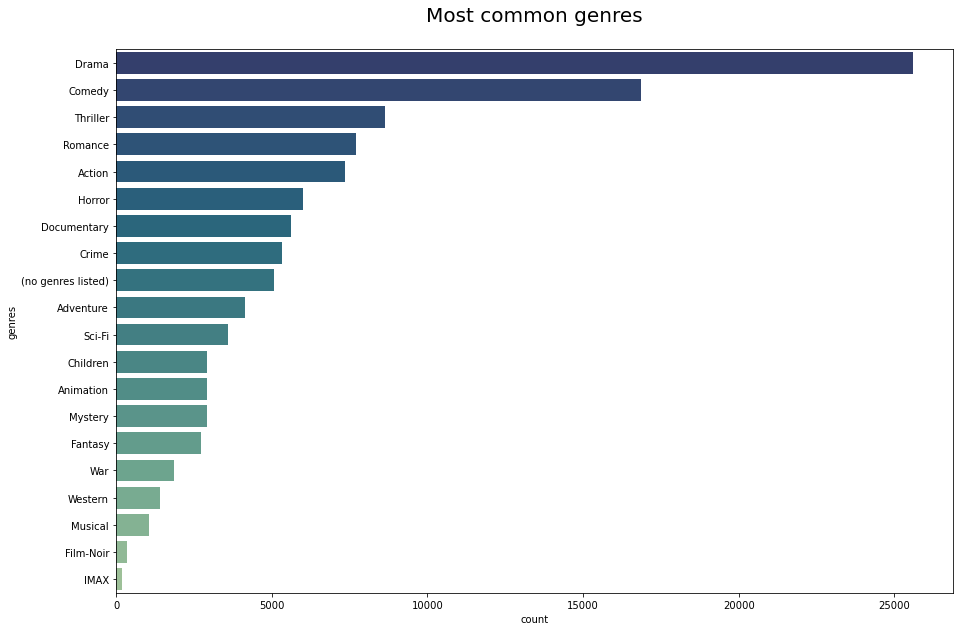

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create dataframe containing only the movieId and genres
movies_genres = pd.DataFrame(movies[['movieId', 'genres']],columns=['movieId', 'genres'])
# Split genres seperated by "|" and create a list containing the genres allocated to each movie
movies_genres.genres = movies_genres.genres.apply(lambda x: x.split('|'))
# Create expanded dataframe where each movie-genre combination is in a seperate row
movies_genres = pd.DataFrame([(tup.movieId, d) for tup in movies_genres.itertuples() for d in tup.genres],
                             columns=['movieId', 'genres'])

plot = plt.figure(figsize=(15, 10))
plt.title('Most common genres\n', fontsize=20)
sns.countplot(y="genres", data=movies_genres,
              order=movies_genres['genres'].value_counts(ascending=False).index,
              palette='crest_r')
plt.show()

It seems people are into some... people like what they like ;)

Let's quickly take a look at `movies.csv`:

In [15]:
demo_frame(movies)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62423 entries, 0 to 62422
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  62423 non-null  int64 
 1   title    62423 non-null  object
 2   genres   62423 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.4+ MB
None


movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy

It would be great to extract the year from the title... if only there was a pre-cleaned version to look at...

In [16]:
# hah, there is!
movies= pd.read_csv('cleaned/movies.csv')

demo_frame(movies)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62423 entries, 0 to 62422
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  62423 non-null  int64  
 1   title    62423 non-null  object 
 2   genres   62423 non-null  object 
 3   year     62423 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 1.9+ MB
None


movieId                        title  \
0        1                    Toy Story   
1        2                      Jumanji   
2        3             Grumpier Old Men   
3        4            Waiting to Exhale   
4        5  Father of the Bride Part II   

                                        genres    year  
0  Adventure|Animation|Children|Comedy|Fantasy  1995.0  
1                   Adventure|Children|Fantasy  1995.0  
2                               Comedy|Romance  1995.0  
3                         Comedy|Drama|Romance  1995.0  
4                                       Comedy  1995.0

Excellent! Genres aren't too interesting, let's take a quick peak at movie releases per year and move on!

In [17]:
fig = px.histogram(movies, x='year', nbins=100, title='Movies released per year')
fig.show()

Not really any major insights here... The number of movies released per year is increasing over time - but that's relatively obvious. Later on, once we've brought in `train.csv` (which contains some timestamp info) we might be able to draw more insightful... insights.

Let's keep Exploring - `tags.csv` is next. We'll give it the same treatment we gave the plot keywords above:

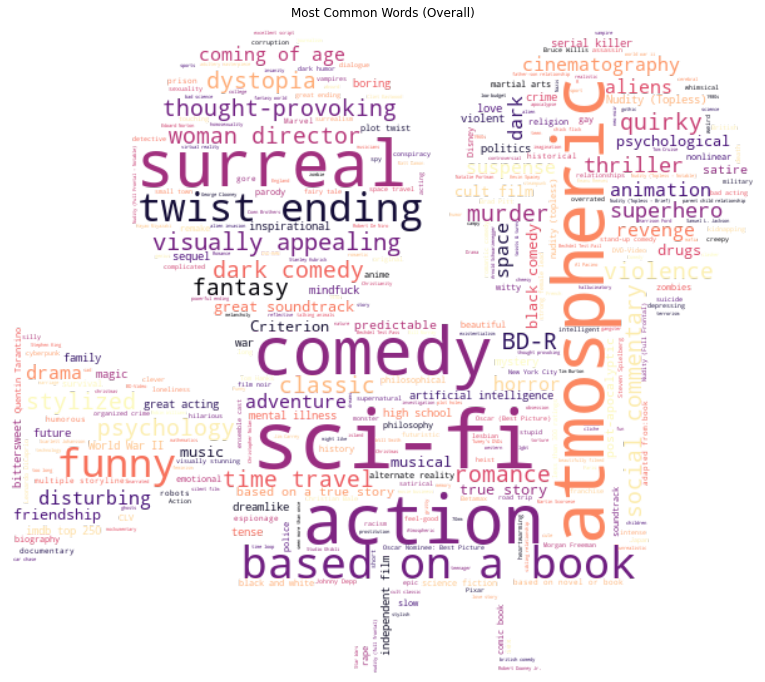

In [18]:
gen_wordcloud(pd.Series(Counter(tags.tag)), "Most Common Words (Overall)", savefig=False)

There are definitely some interesting tags here! We could potentially find similar users by how they tagged movies in some way! Let's carry on; The real meat of our data - the `train.csv` file!

In [19]:
demo_frame(train)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000038 entries, 0 to 10000037
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 305.2 MB
None


userId  movieId  rating   timestamp
0    5163    57669     4.0  1518349992
1  106343        5     4.5  1206238739
2  146790     5459     5.0  1076215539
3  106362    32296     2.0  1423042565
4    9041      366     3.0   833375837

Let's first how many movies each user has rated:

In [20]:
rating_count_by_user = train.groupby('userId').movieId.count().sort_values(ascending=False)
print(rating_count_by_user.iloc[:10])
print(rating_count_by_user.describe())

userId
72315     12952
80974      3680
137293     3588
33844      3208
20055      3050
109731     2671
49403      2670
92046      2579
110971     2288
30879      2284
Name: movieId, dtype: int64
count    162541.000000
mean         61.523173
std         107.410889
min           1.000000
25%          14.000000
50%          28.000000
75%          65.000000
max       12952.000000
Name: movieId, dtype: float64


Our top user has rated almost 13 thousand movies! the average number of ratings per user is 61, with the 25th percentile being 14 ratings. The median number of ratings is 28.

Considering ratings as features of users, to help recommend new content (Collaborative Filtering) definitely seems like a good idea as well.

If we work out the ratings received per movie, we'd have enough data to generate a representative sample of our dataset:

In [21]:
rating_count_by_movie = train.groupby('movieId').userId.count().sort_values(ascending=False)
print(rating_count_by_movie.iloc[:10])
print(rating_count_by_movie.describe())

movieId
318     32831
356     32383
296     31697
593     29444
2571    29014
260     27560
480     25518
527     24004
110     23722
2959    23536
Name: userId, dtype: int64
count    48213.000000
mean       207.413727
std       1092.768777
min          1.000000
25%          1.000000
50%          4.000000
75%         26.000000
max      32831.000000
Name: userId, dtype: float64


In [22]:
from scipy.stats import zscore

active_users = rating_count_by_user[rating_count_by_user > 10]
zscores = zscore(active_users).abs()
active_uids = active_users[zscores < 3].index.values

active_movies = rating_count_by_movie[rating_count_by_movie > 10]
zscores = zscore(active_movies).abs()
active_mids = active_movies[zscores < 3].index.values

sample = train[train.userId.isin(active_uids) & train.movieId.isin(active_mids)]
demo_frame(sample)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5048118 entries, 0 to 10000037
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 192.6 MB
None


userId  movieId  rating   timestamp
0    5163    57669     4.0  1518349992
1  106343        5     4.5  1206238739
2  146790     5459     5.0  1076215539
4    9041      366     3.0   833375837
6   19630    62049     4.0  1246729817

There we have a sample! Let's see how we've influenced the sparsity:

In [23]:
def calc_sparsity(df):
    density = len(df) / (len(df.userId.unique()) * len(df.movieId.unique()))
    return 1 - density

print(f"Original Sparsity: {round(calc_sparsity(train) * 100.0, 2)} %")
print(f"Sampled Sparsity: {round(calc_sparsity(sample) * 100.0, 2)} %")

Original Sparsity: 99.87 %
Sampled Sparsity: 99.77 %


Not significantly changed - but now we have about half as much data to worry about! Let's go ahead and save this model to a file:

In [55]:
sample.to_csv('cleaned/train_sample.csv')

In [24]:
print(train.rating.describe())
print(sample.rating.describe())

count    1.000004e+07
mean     3.533395e+00
std      1.061124e+00
min      5.000000e-01
25%      3.000000e+00
50%      3.500000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64
count    5.048118e+06
mean     3.464265e+00
std      1.069986e+00
min      5.000000e-01
25%      3.000000e+00
50%      3.500000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64


The median rating given is 3.5, the mean is only slightly more at 3.53. Our sample also exhibits a very similar distribution

Now about those *"more insightful insights"*, let's see if there is any relationship between the age of a movie and the rating given:

In [25]:
train['timestamp'] = pd.to_datetime(train["timestamp"], unit='s')
demo_frame(train)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000038 entries, 0 to 10000037
Data columns (total 4 columns):
 #   Column     Dtype         
---  ------     -----         
 0   userId     int64         
 1   movieId    int64         
 2   rating     float64       
 3   timestamp  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 305.2 MB
None


userId  movieId  rating           timestamp
0    5163    57669     4.0 2018-02-11 11:53:12
1  106343        5     4.5 2008-03-23 02:18:59
2  146790     5459     5.0 2004-02-08 04:45:39
3  106362    32296     2.0 2015-02-04 09:36:05
4    9041      366     3.0 1996-05-29 13:17:17

In [26]:
combined = train.merge(movies[['movieId', 'year']], on='movieId', how='left')
combined['delay'] = train.timestamp.dt.year - combined.year

combined.head()

userId  movieId  rating           timestamp    year  delay
0    5163    57669     4.0 2018-02-11 11:53:12  2008.0   10.0
1  106343        5     4.5 2008-03-23 02:18:59  1995.0   13.0
2  146790     5459     5.0 2004-02-08 04:45:39  2002.0    2.0
3  106362    32296     2.0 2015-02-04 09:36:05  2005.0   10.0
4    9041      366     3.0 1996-05-29 13:17:17  1994.0    2.0

Now we can easily, per movie, see how it's ratings change over time (if at all)

In [27]:
subset = combined[(combined.year > 1950)]

In [28]:
by_delay = subset.groupby(['movieId', 'delay'], as_index=False).rating.agg(['mean', 'count'])
subset = by_delay[by_delay['count'] > 100].reset_index()
subset

movieId  delay      mean  count
0            1    1.0  4.131250   2560
1            1    2.0  3.849309   2389
2            1    3.0  3.929379    354
3            1    4.0  3.952236    984
4            1    5.0  4.152332   1372
...        ...    ...       ...    ...
22610   201773    0.0  3.730223    493
22611   202103    0.0  3.470588    119
22612   202429    0.0  3.878082    365
22613   202439    0.0  4.201571    191
22614   204698    0.0  4.000000    342

[22615 rows x 4 columns]

In [29]:
subset['rating_diff'] = subset.groupby('movieId')['mean'].diff(1).fillna(0)

In [30]:
fig = px.scatter(
    subset,
    x='delay',
    y='rating_diff',
    color='rating_diff',
    title='Change in rating over time'
)
fig.update_layout(showlegend=False)
fig.show()

What this colorful mess above is saying is: Movie ratings don't tend to change very much over time.



# Step 3: Preprocessing

We've done most of our preprocessing in our `data_cleaning.py` script. We include the code here for convenience:

```python
def clean_genome():
    genome_scores = pd.read_csv("data/genome_scores.csv")
    genome_tags = pd.read_csv("data/genome_tags.csv")

    genome_data = genome_scores.merge(genome_tags, on="tagId")

    genome_tag_vec = genome_data.pivot(
        index="movieId", columns="tag", values="relevance"
    )
    genome_tag_vec["movieId"] = genome_tag_vec.index

    cols = ["movieId"] + [col for col in genome_tag_vec.columns if col != "movieId"]
    genome_tag_vec = genome_tag_vec[cols]
    genome_tag_vec.reset_index(inplace=True, drop=True)
    genome_tag_vec.to_csv(
        "cleaned/genome_tag_vec.csv",
        index=False,
    )


def clean_imdb():
    imdb_data = pd.read_csv("data/imdb_data.csv")
    budget_to_num = lambda budget: int("".join([c for c in budget if c.isnumeric()]))

    imdb_data["budget"] = imdb_data["budget"].apply(
        lambda b: np.nan if b is np.nan or b[0] != "$" else budget_to_num(b)
    )
    imdb_data.title_cast.fillna("", inplace=True)
    imdb_data.director.fillna("", inplace=True)
    imdb_data.runtime.fillna(int(imdb_data.runtime.median()), inplace=True)
    imdb_data.budget.fillna(int(imdb_data.budget.median()), inplace=True)
    imdb_data.plot_keywords.fillna("", inplace=True)

    imdb_data.to_csv(
        "cleaned/imdb_data.csv",
        index=False,
    )


def clean_movies():
    movies = pd.read_csv("data/movies.csv")

    movies["year"] = (
        movies.title.str.strip()
        .str[-6:]
        .str.extract(r"\(([0-9]{4})\)")
        .fillna(0)
        .astype(int)
    )

    normal_year_mean = movies[movies.year != 0].year.median()
    movies["year"].replace(0, normal_year_mean, inplace=True)

    movies["title"] = movies.title.str.strip().str.replace(
        r"\(([0-9]{4})\)", "", regex=True
    )
    movies["title"] = (
        movies["title"].str.strip().str.replace(r"(.*), The$", r"The \1", regex=True)
    )
    movies["genres"] = movies.genres.str.replace(
        "(no genres listed)", "unknown", regex=False
    )

    movies.to_csv(
        "cleaned/movies.csv",
        index=False,
    )
```


# Step 4: Bring in the models!

Finally! Am I right? First we need to talk about the types of models for recommendations:

There are in essence 3:
- Content-based filtering
- Collaborative filtering
- Hybrid (combine the 2 above + some other stuff)

Scary-sounding stuff right? Basically; All recommendation is about showing a user things they'll like. How do we know what they'll like?
- based on what else they've liked, ie. we find *content* that is similar to what they've already liked
- based on what similar people have liked, ie. our users *collaborate* (work together) to suggest things to each other (indirectly)

How we determine similarity is largely an embedding problem with some math sprinkled in - we don't need to get into too much details. In essence we try to represent each *thing* as a vector (think like a 2d (x, y) point in space, but with more dimentions), and then through the magic of math & information theory things that are similar *should* be close together (either measure by distance between them or angle between them).


We'll start off by looking at **collaborative models**
## Collaborative Filtering


In [31]:
# basic models
from surprise import NormalPredictor, BaselineOnly
# knn based models
from surprise import KNNBasic, KNNWithMeans, KNNBaseline
# matrix factorization models
from surprise import SVD, SVDpp, NMF
# other clustering models
from surprise import SlopeOne, CoClustering

# some tools to bring in our data
from surprise import Dataset, Reader
from surprise.model_selection import cross_validate, GridSearchCV

We'll start off by using only the default hyperparameters for all models, and comparing them on the MovieLens 100k dataset. Then we'll compare them on a random sample of our data; finally we'll pick about 3 models to GridSearch, find the best parameters, and then cross validate them on the full training set

In [32]:
models = (
    NormalPredictor, BaselineOnly, 
    KNNBasic, KNNWithMeans, KNNBaseline, 
    SVD, SVDpp, NMF, 
    SlopeOne, CoClustering
)

In [33]:
ml100k = Dataset.load_builtin('ml-100k')

In [35]:
results = {
    "model": [],
    "train_rmse_mean": [],
    "train_rmse_std": [],
    "test_rmse_mean": [],
    "test_rmse_std": [],
    "fit_time_mean": [],
    "fit_time_std": [],
    "test_time_mean": [],
    "test_time_std": [],
}
for idx, model in enumerate(models):
    print(idx, model.__name__)
    result = cross_validate(
        algo=model(), 
        data=ml100k, 
        cv=5,
        measures=['rmse'], 
        n_jobs=-1, 
        return_train_measures=True
    )
    results['model'].append(model.__name__)
    results['train_rmse_mean'].append(result['train_rmse'].mean())
    results['train_rmse_std'].append(result['train_rmse'].std())

    results['test_rmse_mean'].append(result['test_rmse'].mean())
    results['test_rmse_std'].append(result['test_rmse'].std())

    results['fit_time_mean'].append(np.array(result['fit_time']).mean())
    results['fit_time_std'].append(np.array(result['fit_time']).std())

    results['test_time_mean'].append(np.array(result['test_time']).mean())
    results['test_time_std'].append(np.array(result['test_time']).std())

0 NormalPredictor
1 BaselineOnly
2 KNNBasic
3 KNNWithMeans
4 KNNBaseline
5 SVD
6 SVDpp
7 NMF
8 SlopeOne
9 CoClustering


In [36]:
result_df = pd.DataFrame(results).set_index('model', drop=True)
result_df.sort_values("test_rmse_mean")

train_rmse_mean  train_rmse_std  test_rmse_mean  \
model                                                              
SVDpp                   0.760151        0.001732        0.918986   
KNNBaseline             0.734255        0.000557        0.929569   
SVD                     0.685058        0.000796        0.935837   
BaselineOnly            0.922628        0.001201        0.944160   
SlopeOne                0.831457        0.001473        0.944836   
KNNWithMeans            0.757579        0.000603        0.950125   
NMF                     0.794978        0.002122        0.963496   
CoClustering            0.907837        0.003201        0.965920   
KNNBasic                0.763065        0.001285        0.978163   
NormalPredictor         1.519796        0.005224        1.518498   

                 test_rmse_std  fit_time_mean  fit_time_std  test_time_mean  \
model                                                                         
SVDpp                 0.003459       7.277758      0.014132        1.750092   
KNNBaseline           0.003145       0.179311      0.011947        2.184419   
SVD                   0.003216       0.397609      0.004684        0.082164   
BaselineOnly          0.004970       0.025638      0.002480        0.068184   
SlopeOne              0.006472       0.434618      0.019508        1.680739   
KNNWithMeans          0.004710       0.192697      0.014149        1.790665   
NMF                   0.004815       1.054373      0.015731        0.076944   
CoClustering          0.009147       0.542100      0.015911        0.080686   
KNNBasic              0.005123       0.193539      0.011739        1.671426   
NormalPredictor       0.005066       0.080377      0.016058        0.144198   

                 test_time_std  
model                           
SVDpp                 0.034895  
KNNBaseline           0.032801  
SVD                   0.006288  
BaselineOnly          0.005703  
SlopeOne              0.023326  
KNNWithMeans          0.062569  
NMF                   0.007292  
CoClustering          0.000729  
KNNBasic              0.038259  
NormalPredictor       0.025080

Clearly we don't need to consider the `NormalPredictor` (which is essentially just random guessing) any further. We might also exclude all models that performed worse than `BaselineOnly`, since it's just guessing means - doing worse than this isn't really valuable.

We should also consider overfitting - let's look at the difference between train and test RMSE across all models:

In [37]:
(result_df.train_rmse_mean - result_df.test_rmse_mean).abs().sort_values()

model
NormalPredictor    0.001298
BaselineOnly       0.021532
CoClustering       0.058084
SlopeOne           0.113379
SVDpp              0.158835
NMF                0.168518
KNNWithMeans       0.192546
KNNBaseline        0.195314
KNNBasic           0.215098
SVD                0.250779
dtype: float64

Clearly All our complex - read matrix factorization - models are overfitting quite a bit! Thankfully this can be alleviated by increasing the regularisation hyperparamter; something we'll get to later.

Let's first run the same test on the MovieLens 1M dataset - that should prove insightful too!

In [38]:
ml1m = Dataset.load_builtin('ml-1m')

results_1m = {
    "model": [],
    "train_rmse_mean": [],
    "train_rmse_std": [],
    "test_rmse_mean": [],
    "test_rmse_std": [],
    "fit_time_mean": [],
    "fit_time_std": [],
    "test_time_mean": [],
    "test_time_std": [],
}
for idx, model in enumerate(models):
    print(idx, model.__name__)
    result = cross_validate(
        algo=model(), 
        data=ml1m, 
        cv=5,
        measures=['rmse'], 
        n_jobs=-1, 
        return_train_measures=True
    )
    results_1m['model'].append(model.__name__)
    results_1m['train_rmse_mean'].append(result['train_rmse'].mean())
    results_1m['train_rmse_std'].append(result['train_rmse'].std())

    results_1m['test_rmse_mean'].append(result['test_rmse'].mean())
    results_1m['test_rmse_std'].append(result['test_rmse'].std())

    results_1m['fit_time_mean'].append(np.array(result['fit_time']).mean())
    results_1m['fit_time_std'].append(np.array(result['fit_time']).std())

    results_1m['test_time_mean'].append(np.array(result['test_time']).mean())
    results_1m['test_time_std'].append(np.array(result['test_time']).std())

0 NormalPredictor
1 BaselineOnly
2 KNNBasic
3 KNNWithMeans
4 KNNBaseline
5 SVD
6 SVDpp
7 NMF
8 SlopeOne
9 CoClustering


In [39]:
result_df_1m = pd.DataFrame(results_1m).set_index('model', drop=True)
result_df_1m.sort_values("test_rmse_mean")

train_rmse_mean  train_rmse_std  test_rmse_mean  \
model                                                              
SVDpp                   0.758102        0.001031        0.862173   
SVD                     0.669592        0.000429        0.873963   
KNNBaseline             0.653229        0.000162        0.895129   
SlopeOne                0.869436        0.000496        0.906440   
BaselineOnly            0.899363        0.000279        0.908757   
CoClustering            0.898600        0.001347        0.915754   
NMF                     0.863700        0.000880        0.916630   
KNNBasic                0.657702        0.000203        0.922957   
KNNWithMeans            0.696999        0.000373        0.929061   
NormalPredictor         1.505674        0.000939        1.505994   

                 test_rmse_std  fit_time_mean  fit_time_std  test_time_mean  \
model                                                                         
SVDpp                 0.001426     192.399670      0.651036       38.636847   
SVD                   0.002575       4.600085      0.179655        1.160183   
KNNBaseline           0.001715      16.925973      0.153979       76.286087   
SlopeOne              0.002124      10.106146      0.125403       38.581061   
BaselineOnly          0.001136       0.254235      0.040233        0.955980   
CoClustering          0.003571       4.998105      0.210887        1.119524   
NMF                   0.001793      11.441865      0.247064        1.099235   
KNNBasic              0.001341      34.575410      0.719831       72.044252   
KNNWithMeans          0.000679      16.395892      0.144018       72.163493   
NormalPredictor       0.001567       0.497933      0.081824        1.077513   

                 test_time_std  
model                           
SVDpp                 0.463616  
SVD                   0.075217  
KNNBaseline           0.921858  
SlopeOne              0.661039  
BaselineOnly          0.176587  
CoClustering          0.022136  
NMF                   0.022813  
KNNBasic              1.036512  
KNNWithMeans          0.962397  
NormalPredictor       0.210177

In [40]:
(result_df.train_rmse_mean - result_df.test_rmse_mean).abs().sort_values()

model
NormalPredictor    0.001298
BaselineOnly       0.021532
CoClustering       0.058084
SlopeOne           0.113379
SVDpp              0.158835
NMF                0.168518
KNNWithMeans       0.192546
KNNBaseline        0.195314
KNNBasic           0.215098
SVD                0.250779
dtype: float64

We see roughly the same degree of overfitting, with drastically better accuracy scores. One thing to note is that our amount of data is roughly 10x more, let's see how much longer the models took to train:

In [54]:
((result_df_1m - result_df) / result_df).sort_values('fit_time_mean', ascending=False)

train_rmse_mean  train_rmse_std  test_rmse_mean  \
model                                                              
KNNBasic               -0.138079       -0.842134       -0.056438   
KNNBaseline            -0.110351       -0.709816       -0.037049   
KNNWithMeans           -0.079965       -0.381381       -0.022169   
SVDpp                  -0.002696       -0.404517       -0.061822   
SlopeOne                0.045677       -0.663027       -0.040638   
SVD                    -0.022577       -0.461738       -0.066115   
NMF                     0.086445       -0.585285       -0.048641   
BaselineOnly           -0.025216       -0.767534       -0.037497   
CoClustering           -0.010174       -0.579205       -0.051937   
NormalPredictor        -0.009292       -0.820237       -0.008235   

                 test_rmse_std  fit_time_mean  fit_time_std  test_time_mean  \
model                                                                         
KNNBasic             -0.738235     177.647885     60.318415       42.103470   
KNNBaseline          -0.454490      93.394307     11.888910       33.922833   
KNNWithMeans         -0.855860      84.086494      9.178517       39.299832   
SVDpp                -0.587676      25.436669     45.069214       21.077040   
SlopeOne             -0.671868      22.252928      5.428306       21.954822   
SVD                  -0.199198      10.569368     37.354926       13.120401   
NMF                  -0.627643       9.851824     14.705514       13.286243   
BaselineOnly         -0.771373       8.916410     15.224532       13.020568   
CoClustering         -0.609530       8.219894     12.253934       12.875100   
NormalPredictor      -0.690783       5.194971      4.095606        6.472444   

                 test_time_std  
model                           
KNNBasic             26.091868  
KNNBaseline          27.104791  
KNNWithMeans         14.381281  
SVDpp                12.285948  
SlopeOne             27.339491  
SVD                  10.962789  
NMF                   2.128256  
BaselineOnly         29.964277  
CoClustering         29.368955  
NormalPredictor       7.380406

Some models took **much** longer than others, specifically `KNNBasic` and `KNNWithMeans`. A quick look at the code reveals that both of these are implemented in pure python - so there is much room for improvement.

Still though, our only reasonable options seem to be `SVD` and `SVDpp`. `SVDpp` trains **much** more slowly than `SVD`, but at least it shows similar algorithmic complexity while providing accurate results.

Next let's explore content-based models:

## Content-based Filtering

We'll first combine all of the data we have on any movie into a single massive dataset:

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import MinMaxScaler, Normalizer, StandardScaler

from sklearn.metrics.pairwise import cosine_similarity

from scipy import sparse

import nltk
from nltk.corpus import stopwords

stopwords = stopwords.words('english')

In [43]:
full_combine = (
    movies
    .merge(imdb_data,      on="movieId", how="left")
    .merge(genome_tag_vec, on="movieId", how="left")
    .set_index("movieId", drop=True)
)

normal_year_mean = full_combine[full_combine.year != 0].year.mean()
full_combine['year'].replace(0, normal_year_mean, inplace=True)

# movies.year.fillna(int(movies.year.median()), inplace=True)
# movies.genres.fillna("<unknown>", inplace=True)
full_combine.title = full_combine.title.str.strip().str.replace(r"(.*), The$", r"The \1", regex=True)
full_combine.title_cast.fillna("", inplace=True)
full_combine.director.fillna("", inplace=True)
full_combine.runtime.fillna(int(full_combine.runtime.median()), inplace=True)
full_combine.budget.fillna(int(full_combine.budget.median()), inplace=True)
full_combine.plot_keywords.fillna("", inplace=True)

full_combine['cast_size'] = full_combine.title_cast.str.split('|').apply(len)
full_combine['genre_count'] = full_combine.genres.str.split('|').apply(len)

movie_groups = train.set_index('movieId', drop=True).groupby('movieId')
full_combine['rating_mean'] = movie_groups.rating.mean()
full_combine['rating_std'] = movie_groups.rating.std().fillna(0)

q3 = movie_groups.rating.quantile(0.75)
q1 = movie_groups.rating.quantile(0.25)

full_combine['rating_iqr'] =  q3 - q1
full_combine['rating_count'] = movie_groups.apply(len)

full_combine.fillna(0, inplace=True)

full_combine['movieId'] = full_combine.index.values
full_combine.reset_index(inplace=True, drop=True)
full_combine.head()

title                                       genres  \
0                    Toy Story  Adventure|Animation|Children|Comedy|Fantasy   
1                      Jumanji                   Adventure|Children|Fantasy   
2             Grumpier Old Men                               Comedy|Romance   
3            Waiting to Exhale                         Comedy|Drama|Romance   
4  Father of the Bride Part II                                       Comedy   

     year                                         title_cast  \
0  1995.0  Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...   
1  1995.0  Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...   
2  1995.0  Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...   
3  1995.0  Whitney Houston|Angela Bassett|Loretta Devine|...   
4  1995.0  Steve Martin|Diane Keaton|Martin Short|Kimberl...   

              director  runtime      budget  \
0        John Lasseter     81.0  30000000.0   
1   Jonathan Hensleigh    104.0  65000000.0   
2  Mark Steven Johnson    101.0  25000000.0   
3       Terry McMillan    124.0  16000000.0   
4       Albert Hackett    106.0  30000000.0   

                                       plot_keywords      007  007 (series)  \
0                   toy|rivalry|cowboy|cgi animation  0.02875       0.02375   
1                   board game|adventurer|fight|game  0.04125       0.04050   
2                         boat|lake|neighbor|rivalry  0.04675       0.05550   
3  black american|husband wife relationship|betra...  0.03425       0.03800   
4                    fatherhood|doberman|dog|mansion  0.04300       0.05325   

   ...     wwii   zombie  zombies  cast_size  genre_count  rating_mean  \
0  ...  0.02975  0.08475  0.02200         15            5     3.889971   
1  ...  0.01100  0.10525  0.01975         15            3     3.263414   
2  ...  0.01800  0.09100  0.01775         15            2     3.132325   
3  ...  0.01425  0.08850  0.01500         15            3     2.878099   
4  ...  0.01300  0.08700  0.01600         15            1     3.059165   

   rating_std  rating_iqr  rating_count  movieId  
0    0.924249         1.0       23062.0        1  
1    0.966744         1.0        9654.0        2  
2    1.016368         1.0        4727.0        3  
3    1.073617         2.0         968.0        4  
4    0.995982         1.5        4648.0        5  

[5 rows x 1143 columns]

This humongus dataframe allows us to easily build some feature vectors; first we'll build one for genres:

In [44]:
features = []

In [45]:
genre_vectrz = CountVectorizer(token_pattern=r"[A-z\-]+", min_df=2)
genre_vec = genre_vectrz.fit_transform(full_combine.genres)
print("Genre Tokens:", len(genre_vectrz.get_feature_names()))
features.extend(genre_vectrz.get_feature_names())

Genre Tokens: 20


We'll repeat this process for cast, director, and plot keywords, and we'll even sprinkle in some of those genome tags.

In [46]:
cast_vectrz = CountVectorizer(token_pattern=r"[^\|]+", min_df=20)
cast_vec = cast_vectrz.fit_transform(full_combine.title_cast)
print("Cast Tokens:", len(cast_vectrz.get_feature_names()))
features.extend(cast_vectrz.get_feature_names())

Cast Tokens: 817


In [47]:
director_vectrz = CountVectorizer(token_pattern=r".+", min_df=10, stop_words=['see full summary'])
director_vec = director_vectrz.fit_transform(full_combine.director)
print("Director Tokens:", len(director_vectrz.get_feature_names()))
features.extend(director_vectrz.get_feature_names())

Director Tokens: 30


In [48]:
plot_vectrz = CountVectorizer(token_pattern=r"[^\|]+", min_df=10, stop_words=stopwords)
plot_vec = plot_vectrz.fit_transform(full_combine.plot_keywords)
print("Plot KW Tokens:", len(plot_vectrz.get_feature_names()))
features.extend(plot_vectrz.get_feature_names())

Plot KW Tokens: 1001


In [49]:
genome_features = [col for col in genome_tag_vec.columns if col != 'movieId']
features.extend(genome_features)
sparse_genome = sparse.csr_matrix(full_combine[genome_features])

Now we can easily combined all of these different sparse matrices to produce on final one:

In [50]:
extra_features = ["year", "runtime", "budget", "rating_mean", "rating_std", "rating_iqr", "rating_count"]
features.extend(extra_features)

extra_features = full_combine[extra_features]

scaler = MinMaxScaler()
transformed = scaler.fit_transform(extra_features)
std_extra_sparse = sparse.csr_matrix(transformed)

tfidf_vecs = sparse.hstack([
    # title_vec,
    genre_vec,
    cast_vec,
    director_vec,
    plot_vec,
]).tocsr()

vecs = sparse.hstack([tfidf_vecs, sparse_genome, std_extra_sparse])
norm = Normalizer(copy=True)
norm_vecs = norm.transform(vecs)
norm_vecs.shape

(62423, 3003)

We use the `Normalizer` since the cosine similarity between any 2 (tf normalized) vectors is the same as their dot-product. Thus we can now easily get a list of the top n similar movies to a specified movie:

In [51]:
from collections import OrderedDict

def top_n_similar_to(movieId: int, n=10) -> OrderedDict:
    results = dict()
    movie_idx = movies[movies['movieId'] == movieId].index[0]
    similarities = norm_vecs.dot(norm_vecs.getrow(movie_idx).transpose()).toarray().flatten()
    top_n = similarities.argsort(axis=0)[-n-1:-1][::-1]

    for similar_idx in top_n:
        title = full_combine.iloc[similar_idx].title
        sim = round(similarities[similar_idx] * 100.0, 0)
        results[title] = (sim, similar_idx)
        
    return OrderedDict(sorted(results.items(), key=lambda kv: kv[1], reverse=True))

def batch_similar_to(movies: [int], n=10):
    results = dict()
    for mid in movies:
        res = top_n_similar_to(mid, n=n)
        for movie, (sim, idx) in res.items():
            if (movie in results) and (results[movie][0] < sim):
                results[movie] = (sim, idx)
            else:
                results[movie] = (sim, idx)

    return OrderedDict(sorted(results.items(), key=lambda kv: kv[1], reverse=True)[:n])

And a quick demo:

In [52]:
avengers = 89745
avengers2 = 122892
amazing_spiderman = 95510
fault_in_stars = 111921

import pprint 
pp = pprint.PrettyPrinter(indent=4)

pp.pprint(top_n_similar_to(avengers))
print()
pp.pprint(batch_similar_to([amazing_spiderman, fault_in_stars]))

OrderedDict([   ('Iron Man', (90.0, 12324)),
                ('Avengers: Age of Ultron', (89.0, 25058)),
                ('Ant-Man', (88.0, 25061)),
                ('Captain America: The Winter Soldier', (88.0, 21348)),
                ('Iron Man 2', (88.0, 14628)),
                ('Doctor Strange', (87.0, 25072)),
                ('Captain America: Civil War', (86.0, 25071)),
                ('Guardians of the Galaxy 2', (86.0, 25070)),
                ('Iron Man 3', (86.0, 19678)),
                ('Thor', (86.0, 16312))])

OrderedDict([   ('The Amazing Spider-Man 2', (90.0, 21454)),
                ('Justice League', (89.0, 25060)),
                ('Me Before You', (88.0, 37152)),
                ('Avengers: Age of Ultron', (88.0, 25058)),
                ('Superman Returns', (88.0, 10890)),
                ('X-Men: Apocalypse', (87.0, 25073)),
                ('Batman v Superman: Dawn of Justice', (86.0, 30708)),
                ('Captain Marvel', (86.0, 25066)),
               

Amazing! Well... semi-amazing. It works! We'll keep working to improve the collaborative models since they are in need of the most optimization. Content-based works, but it's not as magical.

# Step 5: Who's a good model?

Based on the above exploration we'll be sticking to the `SVD` model from now on; We'll provide an additional script with some `SVDpp` stuff in - but it's simply not feasible to train for 35x as long to gain a 1-2% improvement.

The following code is copied verbatim from the `scripts/train_model.py` file

```python
from surprise.dump import dump

random_state = 42

reader = Reader(
    name=None,
    line_format="user item rating",
    sep=",",
    rating_scale=(1, 5),
    skip_lines=1,
)

print("Loading data...")
data = Dataset.load_from_file("data/train.csv", reader)

print("Building training file")
train_set = data.build_full_trainset()

del data
del reader

algo = SVD(random_state=random_state, verbose=True)

print("Fitting...")
algo.fit(train_set)

print("Dumping...")
dump("model.pkl", algo=algo, verbose=1)
```

# Step 6: The Proof is in the Pudding

Having found the best possible model (within reason), we now have to make a `submission.csv` file to upload to Kaggle for scoring.

Once again, the code comes from `scripts/make_submission.py`

```python
from surprise.dump import load

print("Loading model...")
_, algo = load("model.pkl")

print("Loading prediction data...")
test = pd.read_csv("data/test.csv")

preds = dict()

print("Predicting...")
total = len(test)

for idx, (uid, mid) in enumerate(test.to_records(index=False)):
    _, _, _, est, details = algo.predict(str(uid), str(mid))

    if details["was_impossible"]:
        print(idx, "Impossible")

    pred_id = f"{uid}_{mid}"
    preds[pred_id] = est

    if ((idx + 1) % 456_000) == 0:
        print("[progress]", round(idx / total * 100.0, 1), "%")

print("Producing output csv...")
pd.Series(preds, name="rating", index=preds.keys()).to_csv(
    "submission.csv", index_label="Id"
)
```

# Step 7: Goodbye.

In this Notebook we quickly explored the Movie Lens dataset & built some models to exploit it. We learned about collaborative- & content-based filtering methods for recommender algorithms & gained an understanding of how to use Surprise.

We also discovered that people on the internet are not ashamed to like what they like ;)

# In summary:
- Collaborative models use various methods to perform dimensionality reduction on a user-item matrix in order to discover some latent features.
- Content based models attempt to define how similar two items are, and then attempts to use this similarity metric to recommend items.
- Hybrid approaches that combine these methods do exist, however we have not explored them (yet).
- The cold start problem is not as big a problem as it sounds;
    - If a user seems anonymous we just recommend popular items
    - Through these recommendations we quickly discover what they do and do not like.
